In [1]:
! pwd

/home/jovyan/mygit/test1


In [2]:
! jupyter --paths

config:
    /home/jovyan/.jupyter
    /opt/conda/etc/jupyter
    /usr/local/etc/jupyter
    /etc/jupyter
data:
    /home/jovyan/.local/share/jupyter
    /opt/conda/share/jupyter
    /usr/local/share/jupyter
    /usr/share/jupyter
runtime:
    /home/jovyan/.local/share/jupyter/runtime


In [3]:
! pip freeze

alembic==1.0.8
asn1crypto==0.24.0
async-generator==1.10
attrs==19.1.0
backcall==0.1.0
beautifulsoup4==4.7.1
bleach==3.1.0
blinker==1.4
bokeh==1.0.4
certifi==2019.3.9
certipy==0.1.3
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==0.8.1
conda==4.6.14
cryptography==2.6.1
cycler==0.10.0
Cython==0.29.7
cytoolz==0.9.0.1
dask==1.1.5
decorator==4.4.0
defusedxml==0.5.0
dill==0.2.9
distributed==1.28.0
entrypoints==0.3
fastcache==1.1.0
gmpy2==2.0.8
h5py==2.9.0
heapdict==1.0.0
idna==2.8
imageio==2.5.0
ipykernel==5.1.0
ipython==7.5.0
ipython-genutils==0.2.0
ipywidgets==7.4.2
jedi==0.13.3
Jinja2==2.10.1
jsonschema==3.0.1
jupyter-client==5.2.4
jupyter-core==4.4.0
jupyterhub==1.0.0
jupyterlab==0.35.5
jupyterlab-server==0.2.0
kiwisolver==1.1.0
llvmlite==0.27.1
locket==0.2.0
Mako==1.0.7
MarkupSafe==1.1.1
matplotlib==3.0.3
mistune==0.8.4
mpmath==1.1.0
msgpack==0.6.1
nbconvert==5.5.0
nbformat==4.4.0
networkx==2.3
notebook==5.7.8
numba==0.42.1
numexpr==2.6.9
numpy==1.15.4
oauthlib==3.0.1
olefile==0.46


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

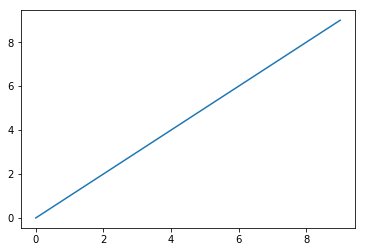

In [5]:
plt.plot(np.arange(10))

In [6]:
! wget https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc

--2019-07-04 05:32:44--  https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc
Resolving www.unidata.ucar.edu (www.unidata.ucar.edu)... 128.117.149.20
Connecting to www.unidata.ucar.edu (www.unidata.ucar.edu)|128.117.149.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2767916 (2.6M) [application/x-netcdf]
Saving to: ‘sresa1b_ncar_ccsm3-example.nc.1’

sresa1b_ncar_ccsm3- 100%[===================>]   2.64M  1.13MB/s    in 2.3s    

2019-07-04 05:32:47 (1.13 MB/s) - ‘sresa1b_ncar_ccsm3-example.nc.1’ saved [2767916/2767916]



In [7]:
ds = xr.open_dataset('tos_O1_2001-2002.nc', decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 170, lon: 180, time: 24)
Coordinates:
  * lon        (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
  * lat        (lat) float64 -79.5 -78.5 -77.5 -76.5 ... 86.5 87.5 88.5 89.5
  * time       (time) float64 15.0 45.0 75.0 105.0 ... 615.0 645.0 675.0 705.0
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    time_bnds  (time, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes:
    title:          IPSL  model output prepared for IPCC Fourth Assessment SR...
    institution:    IPSL (Institut Pierre Simon Laplace, Paris, France)
    source:         IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96...
    contact:        Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr
    project_id:     IPCC Fourth Assessment
    table_id:       Table O1 (13 November 2004)
    experiment_id:  SRES A2 experiment
    realization:    

In [9]:
ds['tos']

<xarray.DataArray 'tos' (time: 24, lat: 170, lon: 180)>
[734400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * lat      (lat) float64 -79.5 -78.5 -77.5 -76.5 -75.5 ... 86.5 87.5 88.5 89.5
  * time     (time) float64 15.0 45.0 75.0 105.0 ... 615.0 645.0 675.0 705.0
Attributes:
    standard_name:   sea_surface_temperature
    long_name:       Sea Surface Temperature
    units:           K
    cell_methods:    time: mean (interval: 30 minutes)
    original_name:   sosstsst
    original_units:  degC
    history:          At   16:37:23 on 01/11/2005: CMOR altered the data in t...

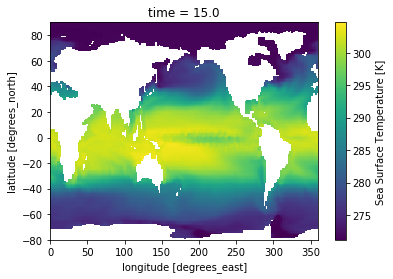

In [12]:
ds['tos'].isel(time=0).plot()

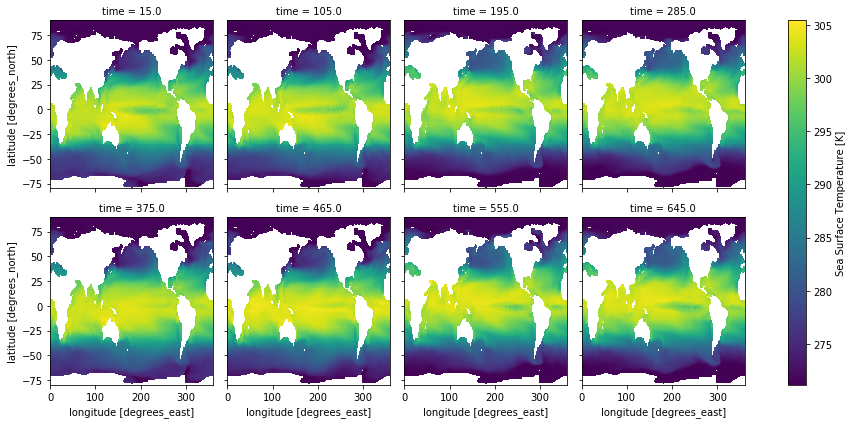

In [19]:
ds['tos'].isel(time=slice(0,24,3)).plot(col='time', col_wrap=4)

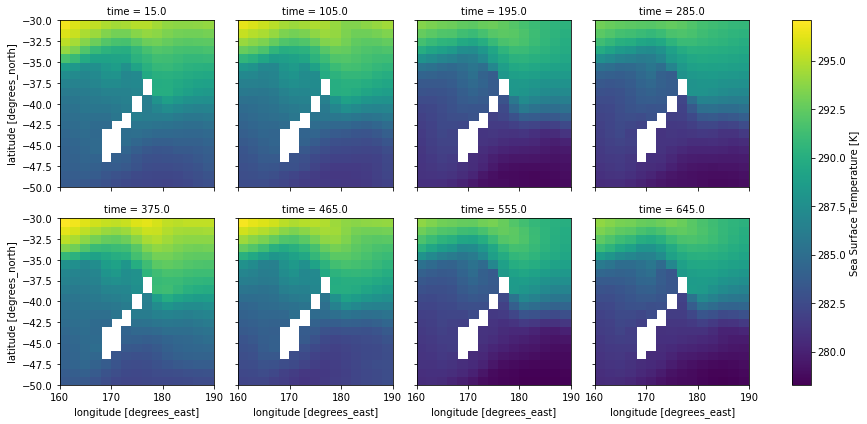

In [29]:
ds['tos'].isel(time=slice(0,24,3)).sel(lon=slice(160,190), lat=slice(-50,-30)).plot(col='time', col_wrap=4)

In [33]:
ts1 = ds['tos'].sel(lon=slice(160,161), lat=slice(-50,-49)).squeeze(drop=True).to_dataframe()
ts2 = ds['tos'].sel(lon=slice(160,161), lat=slice(-40,-39)).squeeze(drop=True).to_dataframe()

In [57]:
import pandas as pd
ts = pd.concat([ts1, ts2], axis=1)
ts.columns = ['south', 'north']
ts.head()

,south,north
time,,
15.0,283.590759,285.558014
45.0,284.065857,286.157776
75.0,283.497772,285.611359
105.0,282.616699,285.247284
135.0,281.449615,284.311188


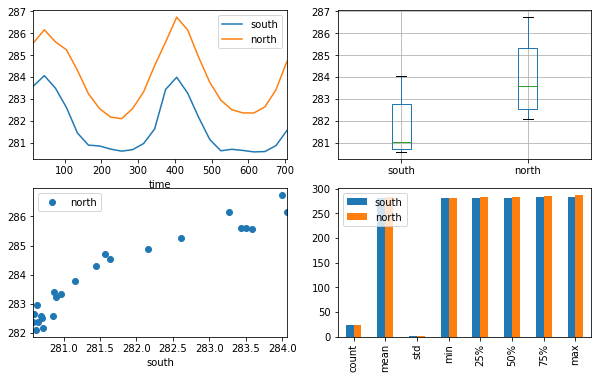

In [63]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
ts.plot(ax=axs[0,0])
ts.boxplot(ax=axs[0,1])
ts.plot(ax=axs[1,0], x='south', y='north', ls='', marker='o')
ts.describe().plot.bar(ax=axs[1,1])